In [1]:
# Import required libraries and set display configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for high-resolution plots in Jupyter
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.unicode_minus'] = False

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate synthetic classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_clusters_per_class=1,
    random_state=42
)

# Create feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget distribution:")
print(df['target'].value_counts(normalize=True))

Dataset shape: (1000, 11)

First 5 rows:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -3.358483   3.159918   0.827163   0.069638  -6.715639  -2.708559   
1   2.071819  -4.055419  -2.615940  -2.599432   3.053752   0.366795   
2  -0.633460   0.712482   2.024390  -0.432639  -1.307929   0.419320   
3  -0.464478   0.892442   2.521010   2.766580  -1.933734  -1.418018   
4   1.042426  -1.192605  -2.071386  -0.131231   0.545377   0.379060   

   feature_6  feature_7  feature_8  feature_9  target  
0   0.183206   1.113502   1.730759   1.228394       1  
1  -0.392171  -1.191720  -1.220516   1.899925       0  
2  -1.469510  -0.719051   1.155005   2.018026       0  
3   1.391760  -2.430279   1.308295  -0.270896       1  
4  -0.062978  -1.325591   2.037936   0.115414       0  

Target distribution:
target
1    0.502
0    0.498
Name: proportion, dtype: float64


In [3]:
# Data preprocessing pipeline
def preprocess_data(df):
    """
    Preprocess the dataset: separate features and target, scale features
    """
    # Separate features and target
    X = df.drop('target', axis=1)
    y = df['target']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale the features (essential for SVM)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

X_train, X_test, y_train, y_test = preprocess_data(df)[:4]

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:", np.bincount(y_train) / len(y_train))

Training set shape: (800, 10)
Test set shape: (200, 10)
Training target distribution: [0.4975 0.5025]


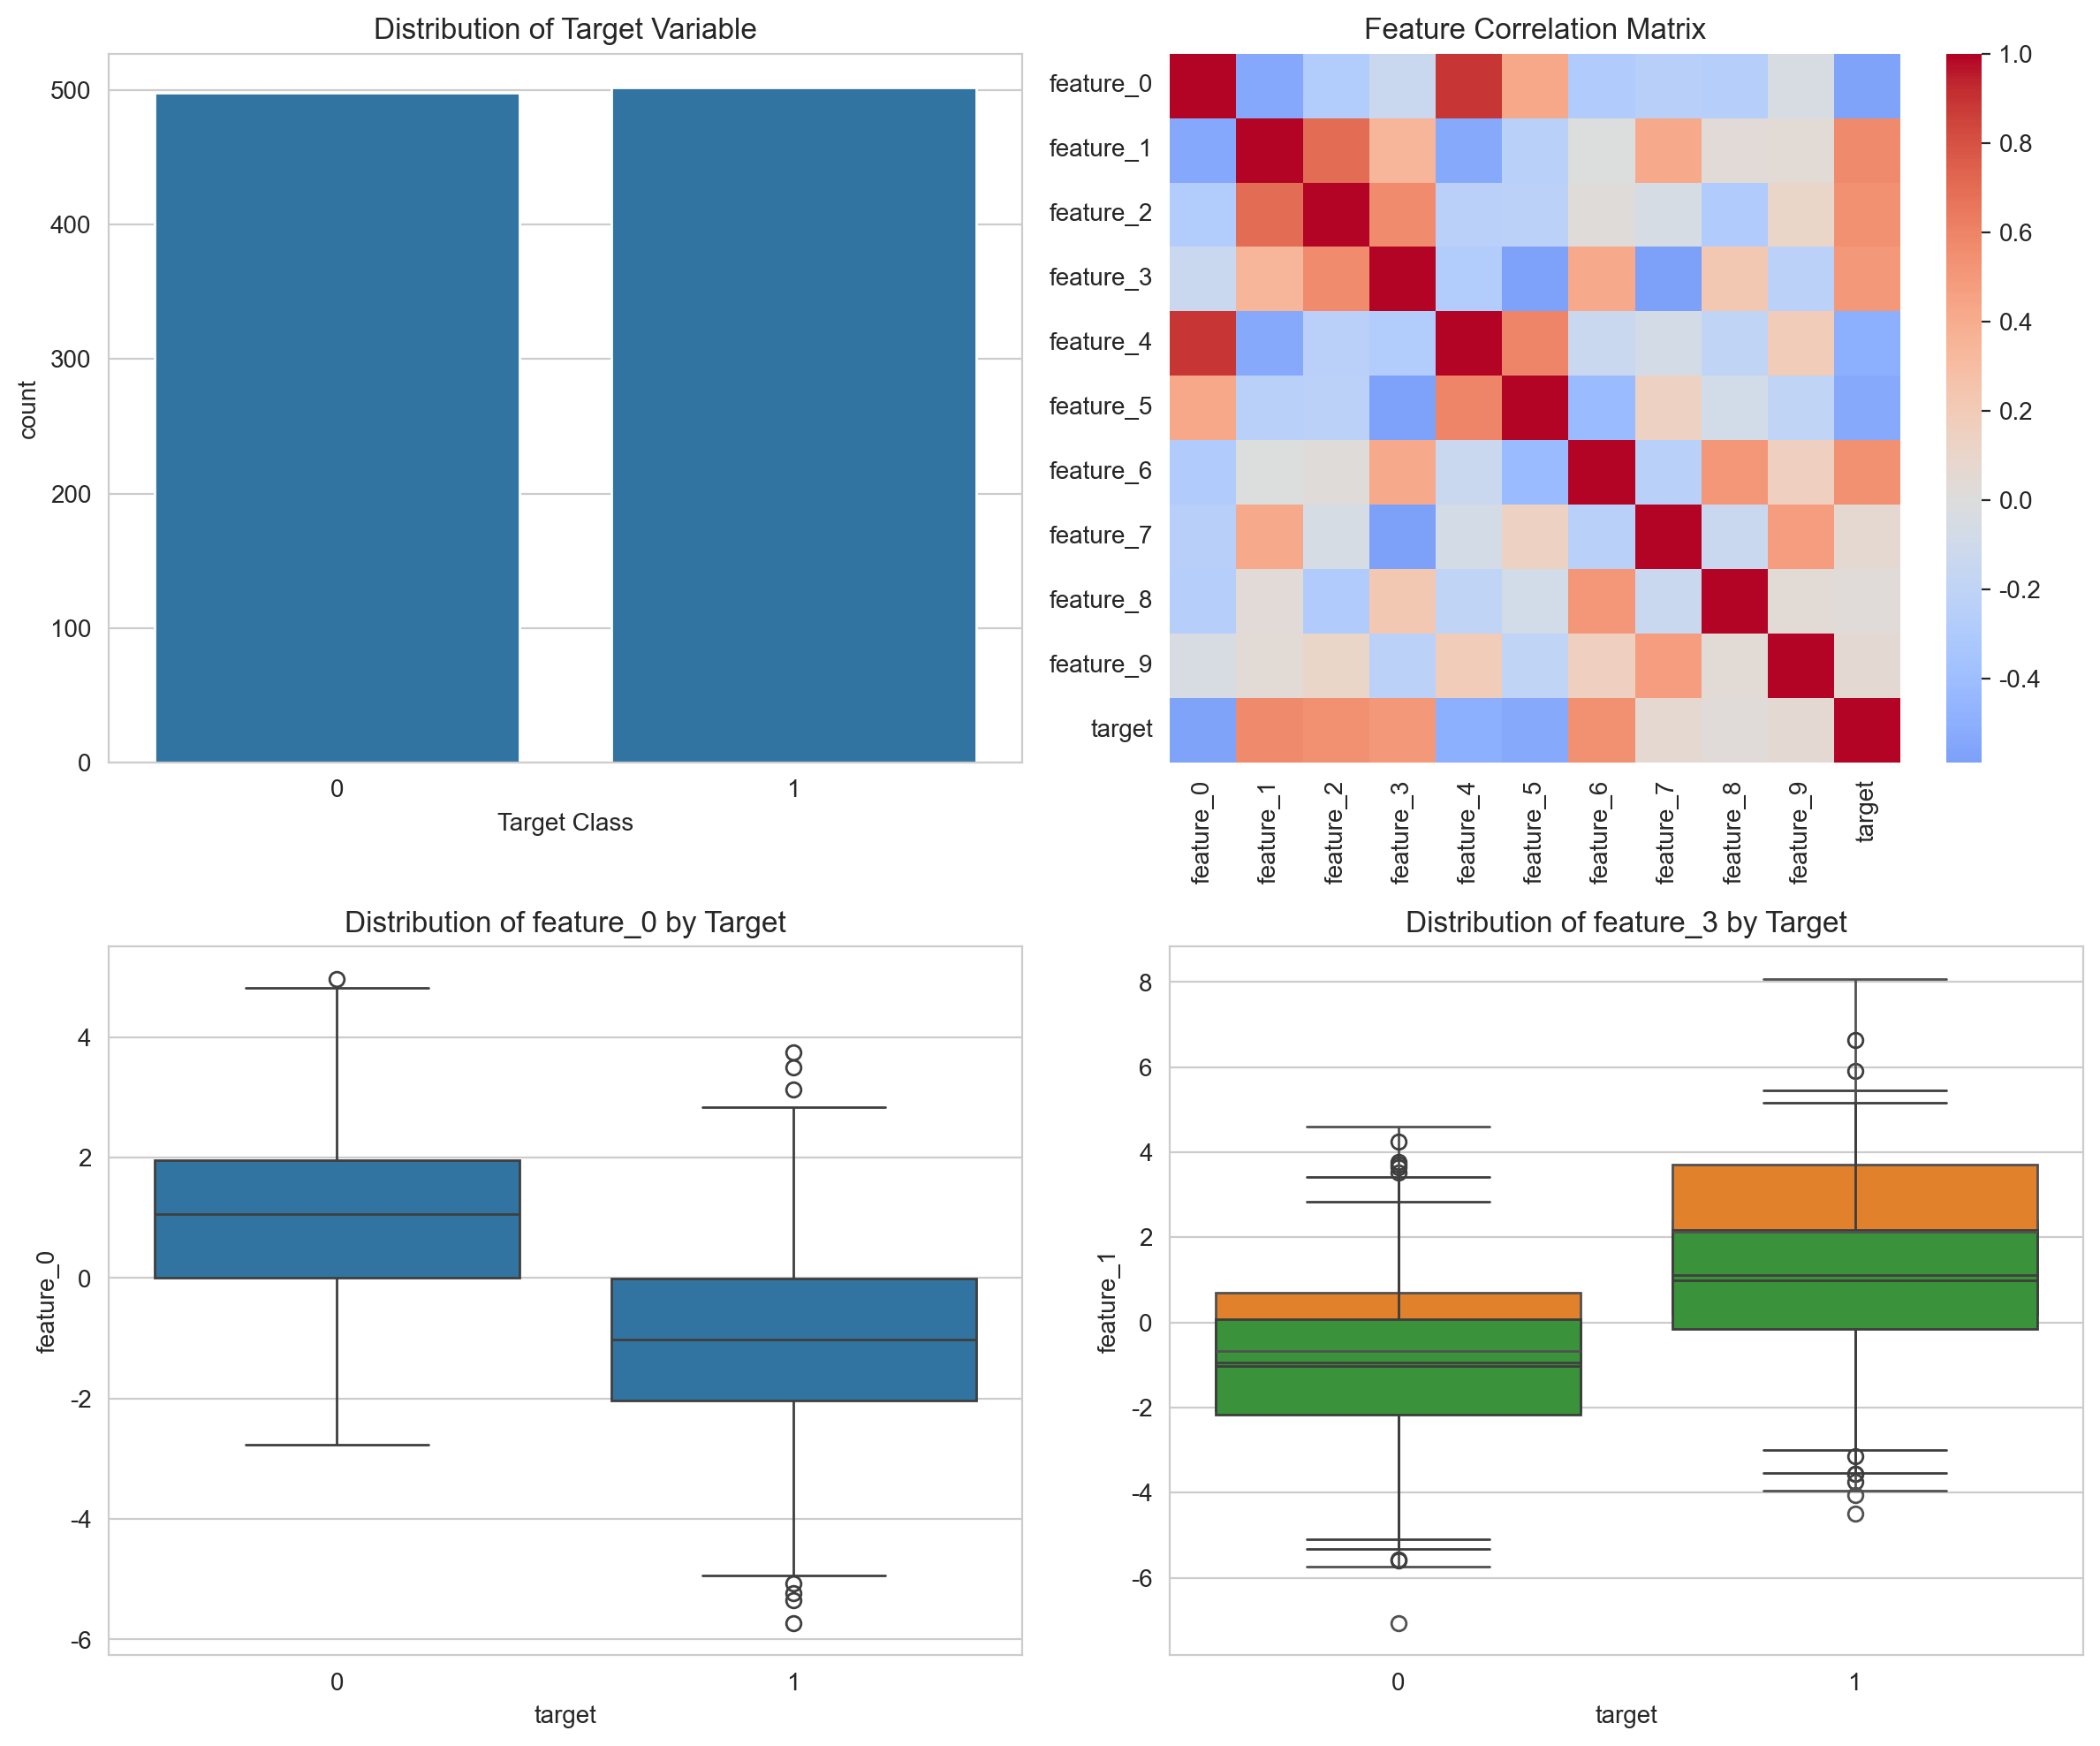

Statistical Summary of Features:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.011969     0.129752     0.706672    -0.016344    -0.498672   
std       1.808578     1.898759     2.557031     1.971651     2.887880   
min      -5.727136    -5.573060    -7.065298    -5.587152    -8.955052   
25%      -1.232362    -1.181259    -1.115875    -1.400761    -2.538922   
50%       0.001062     0.085923     0.677475    -0.038077    -0.696768   
75%       1.207415     1.437913     2.418557     1.397473     1.373167   
max       4.971656     5.911466     8.080278     6.645896    10.746849   

         feature_5    feature_6    feature_7    feature_8    feature_9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.033892    -0.042067    -0.919433     1.017852     1.008241   
std       1.845013     1.855610     1.483525     1.603109     1.733232   
min 

In [4]:
# Exploratory Data Analysis
fig, axes = plt.subplots(2, 2)

# Distribution of target variable
sns.countplot(x='target', data=df, ax=axes[0,0])
axes[0,0].set_title('Distribution of Target Variable')
axes[0,0].set_xlabel('Target Class')

# Feature correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Matrix')

# Feature distribution (first 4 features)
for i, feature in enumerate(feature_names[:4]):
    row, col = (1, i//2) if i >= 2 else (1, i)
    sns.boxplot(data=df, x='target', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by Target')

plt.tight_layout()
plt.show()

# Print statistical summary
print("Statistical Summary of Features:")
print(df.describe())

In [5]:
# Train SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("Model Performance Metrics:")
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Performance Metrics:
Training Accuracy: 0.9825
Test Accuracy: 0.9850
AUC Score: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.97      1.00      0.99       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



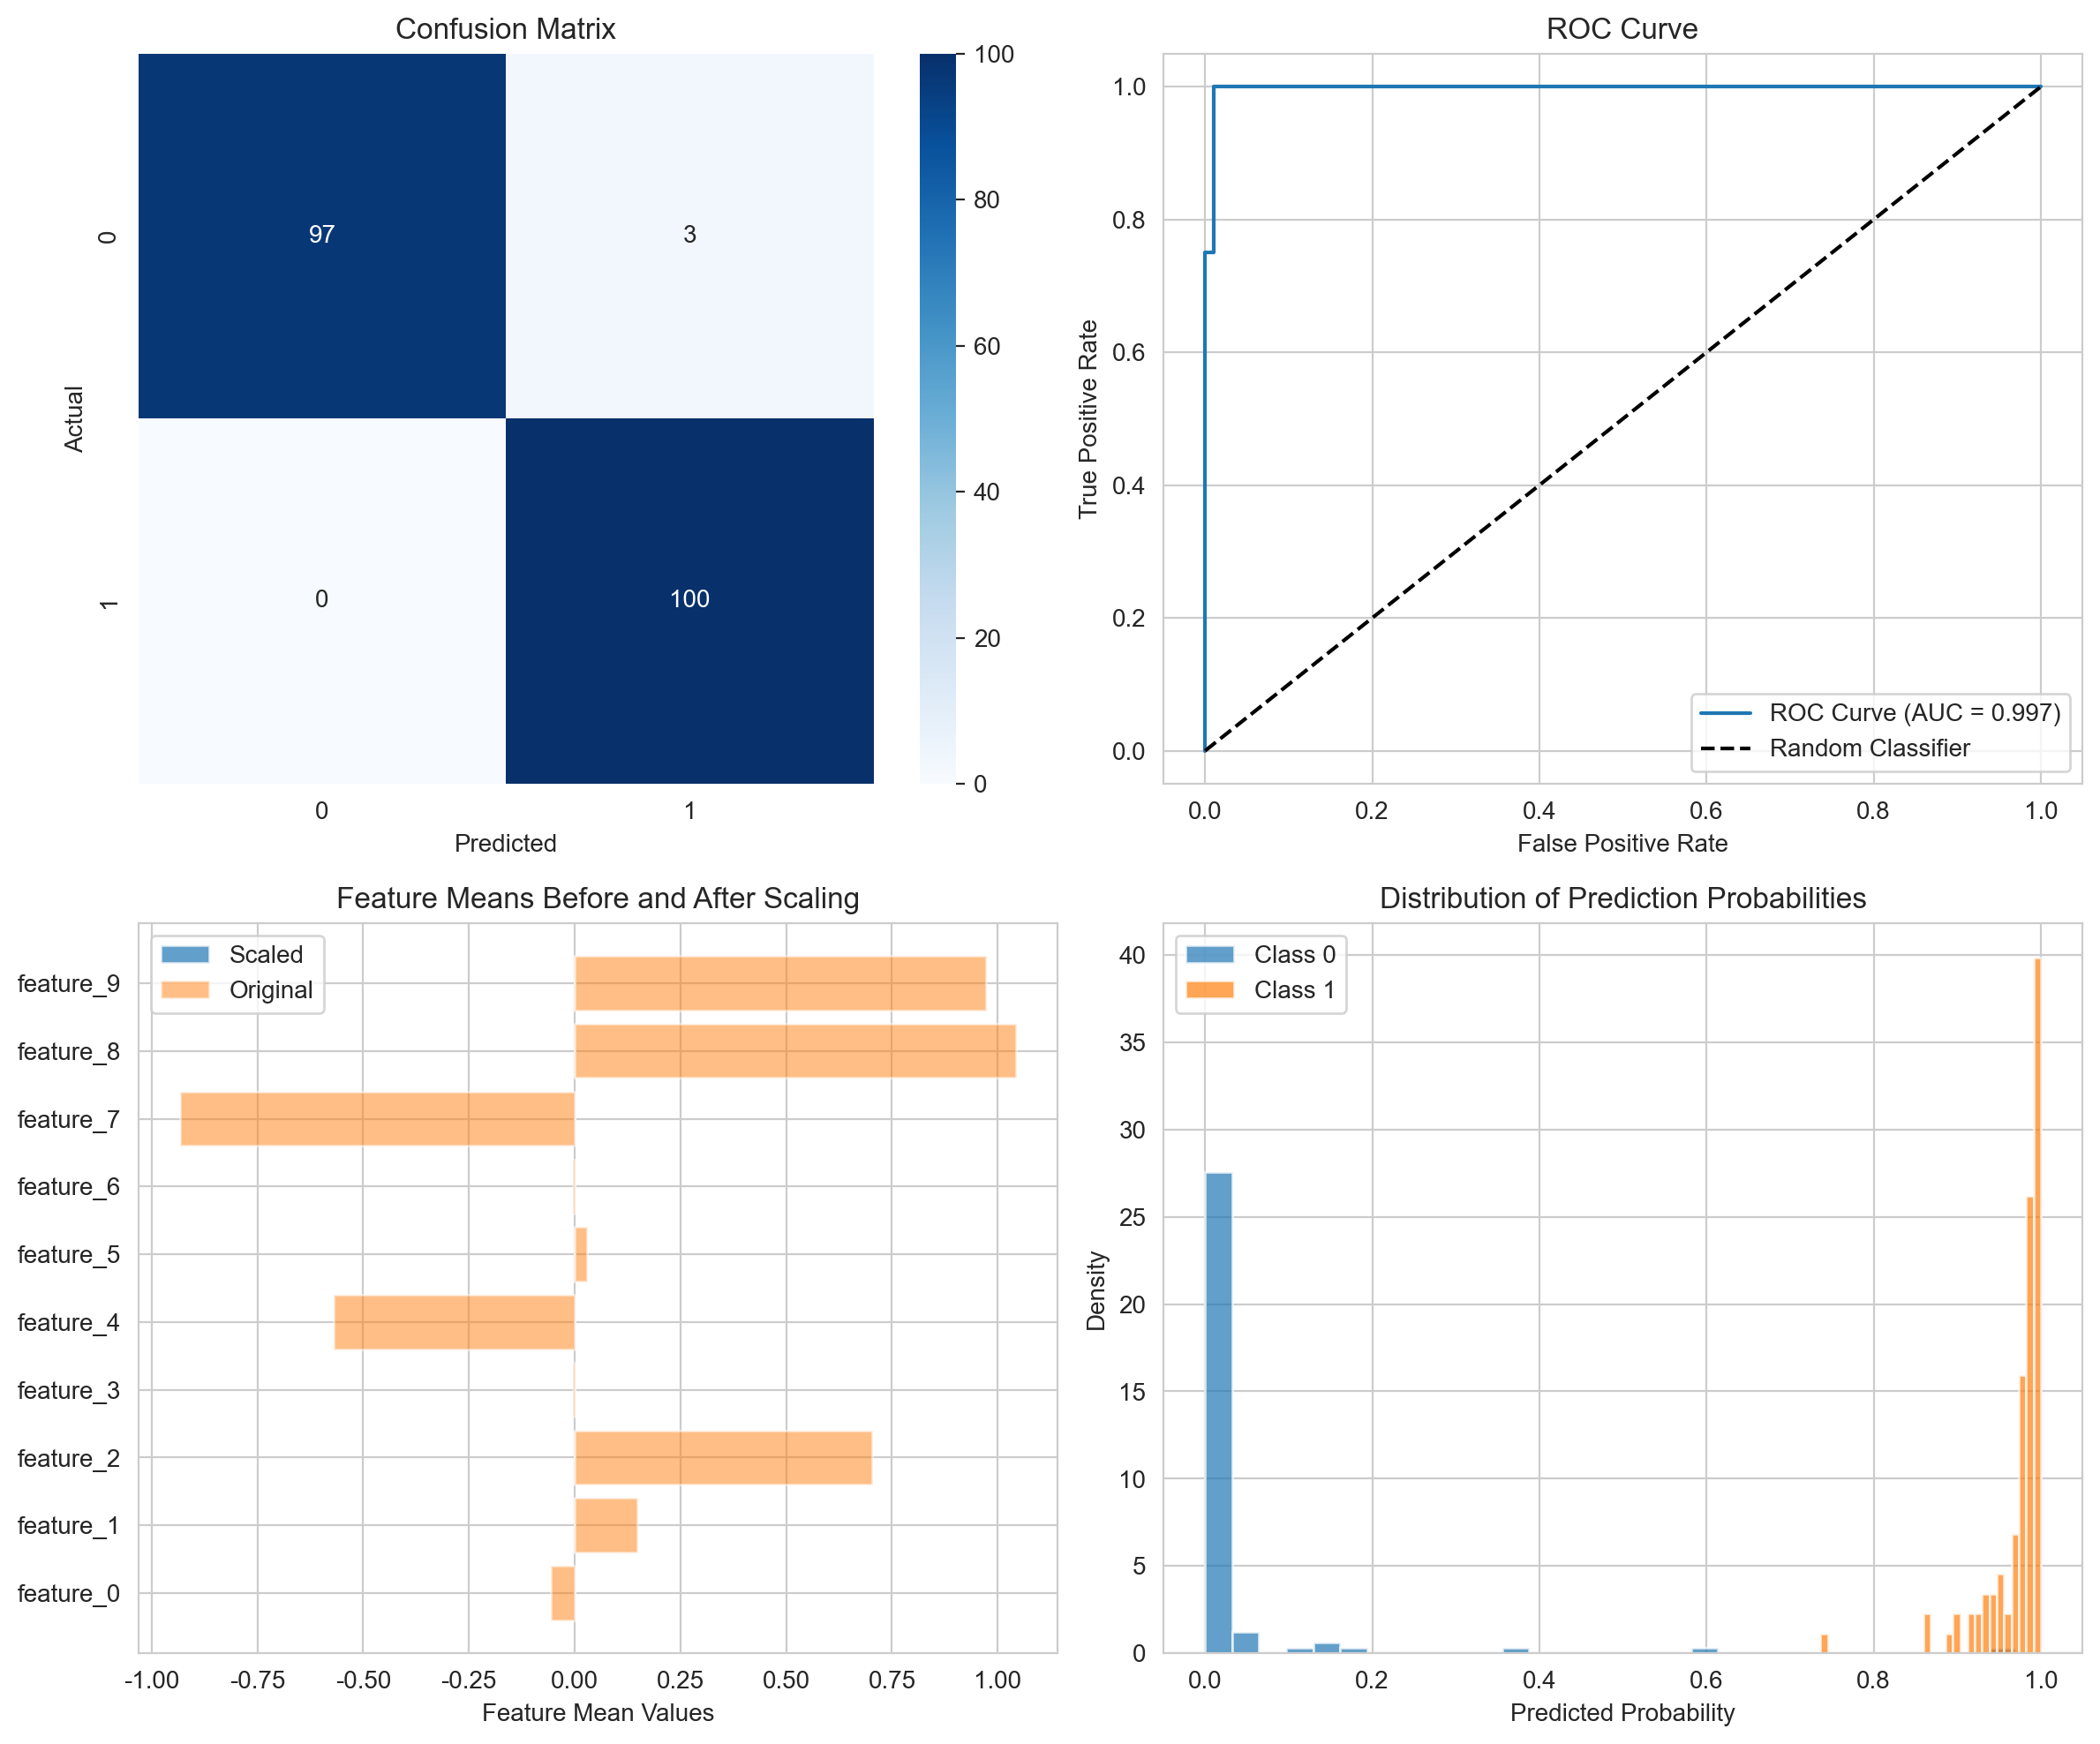

In [6]:
# Visualization of results
fig, axes = plt.subplots(2, 2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0,1].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
axes[0,1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve')
axes[0,1].legend()

# Feature scaling visualization (showing the effect of StandardScaler)
X_train_original = df.drop('target', axis=1).iloc[:X_train.shape[0]]
feature_means_scaled = np.mean(X_train, axis=0)
feature_means_original = np.mean(X_train_original.values, axis=0)

axes[1,0].barh(range(len(feature_names)), feature_means_scaled, alpha=0.7, label='Scaled')
axes[1,0].barh(range(len(feature_names)), feature_means_original, alpha=0.5, label='Original')
axes[1,0].set_yticks(range(len(feature_names)))
axes[1,0].set_yticklabels(feature_names)
axes[1,0].set_xlabel('Feature Mean Values')
axes[1,0].set_title('Feature Means Before and After Scaling')
axes[1,0].legend()

# Prediction probability distribution
axes[1,1].hist(y_pred_proba[y_test==0], bins=30, alpha=0.7, label='Class 0', density=True)
axes[1,1].hist(y_pred_proba[y_test==1], bins=30, alpha=0.7, label='Class 1', density=True)
axes[1,1].set_xlabel('Predicted Probability')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Distribution of Prediction Probabilities')
axes[1,1].legend()

plt.tight_layout()
plt.show()

SVM Model Parameters:
Kernel: rbf
C (Regularization): 1.0
Gamma: scale
Number of support vectors: [65 78]
Total support vectors: 143


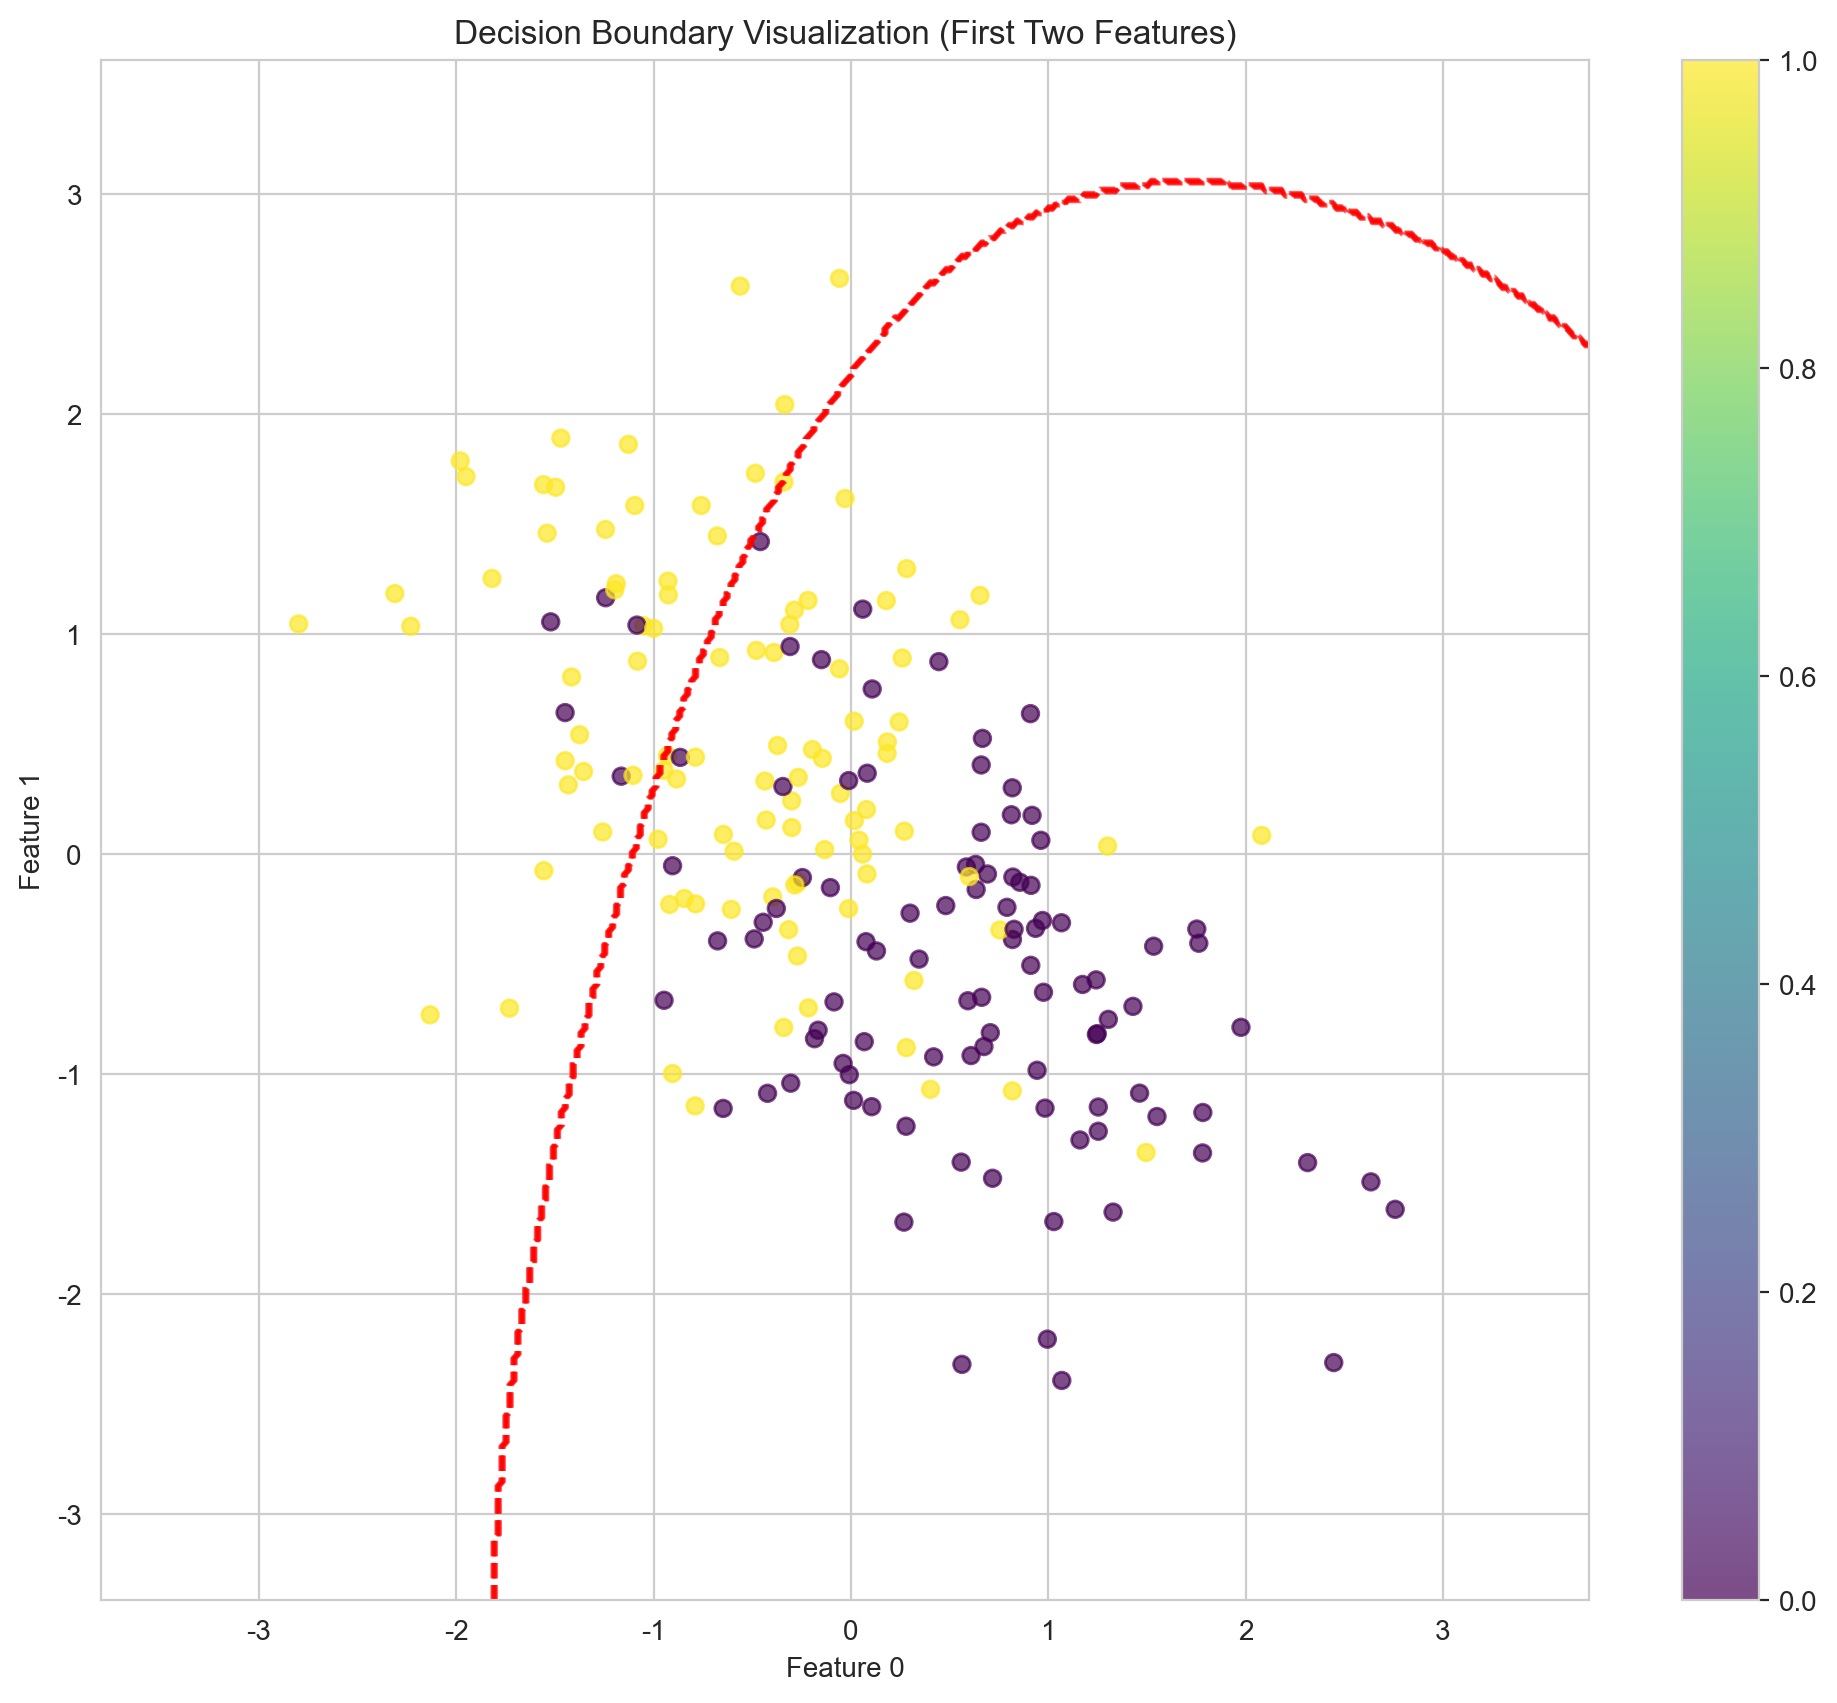

In [7]:
# Model interpretation and insights
print("SVM Model Parameters:")
print(f"Kernel: {model.kernel}")
print(f"C (Regularization): {model.C}")
print(f"Gamma: {model.gamma}")
print(f"Number of support vectors: {model.n_support_}")
print(f"Total support vectors: {sum(model.n_support_)}")

# Calculate decision function values
decision_values = model.decision_function(X_test)

# Visualize decision boundary (using first two features for 2D visualization)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Decision Boundary Visualization (First Two Features)')
plt.colorbar(scatter)

# Create a mesh to plot the decision boundary
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Only use first two features for 2D visualization
X_mesh = np.c_[xx.ravel(), yy.ravel()]
X_mesh_full = np.zeros((X_mesh.shape[0], X_train.shape[1]))
X_mesh_full[:, :2] = X_mesh
Z = model.predict(X_mesh_full)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linestyles='--', alpha=0.5)
plt.show()